In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

import plotly.graph_objects as go

In [41]:
Trump = pd.read_csv('https://raw.githubusercontent.com/BukharealSaif/MachineLearningWithFAF/main/Trumpall2.csv')
Biden = pd.read_csv('https://raw.githubusercontent.com/BukharealSaif/MachineLearningWithFAF/main/Bidenall2.csv')

In [42]:
print(Biden.shape)

(2540, 2)


In [43]:
print(Trump.head())

              user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...


In [44]:
Biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [45]:
Trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    2788 non-null   object
 1   text    2788 non-null   object
dtypes: object(2)
memory usage: 43.7+ KB


In [46]:
Trump['text'][300]

' Thank you Mr. President!'

In [47]:
Biden['text'][200]

'@JoeBiden Yes'

In [48]:
TextBlob(Trump['text'][1]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [49]:
TextBlob(Biden['text'][200]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [50]:
def polarity(review):
  return TextBlob(review).sentiment.polarity

In [51]:
Trump['polarity'] = Trump['text'].apply(polarity)
Biden['polarity'] = Biden['text'].apply(polarity)

In [52]:
Trump.head()

,user,text,polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50
4,James09254677,After 4 years you think you would have figure...,0.00


In [58]:
Biden.head()

,user,text,polarity,Expression
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,Neural
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,Neural
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,Neural
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,Positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,Neural


In [59]:
Trump['Expression'] = np.where(Trump['polarity']>0, 'Positive', 'Negative')
Trump.loc[Trump.polarity == 0, 'Expression'] = 'Neutral'
Trump.head()

,user,text,polarity,Expression
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05,Positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00,Neutral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50,Negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50,Positive
4,James09254677,After 4 years you think you would have figure...,0.00,Neutral


In [61]:
Biden['Expression'] = np.where(Biden['polarity']>0, 'Positive', 'Negative')
Biden.loc[Biden.polarity == 0, 'Expression'] = 'Neutral'
Biden.head()

,user,text,polarity,Expression
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,Neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,Neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,Neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,Positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,Neutral


In [66]:
def exp_graph(reviews, title):
  group = reviews.groupby('Expression').count()
  Pol_count = list(group['polarity'])
  Exp = list(group.index)

  group_list = list(zip(Pol_count, Exp))

  df = pd.DataFrame(group_list, columns=['Pol_count', 'Exp'])

  df['color'] = 'rgb(14,185,54)'
  df.loc[df.Exp == 'Neutral', 'color'] = 'rgb(18,29,31)'
  df.loc[df.Exp == 'Negative', 'color'] = 'rgb(206,31,31)'

  go.Figure(go.Bar(x=df['Pol_count'],
                   y = df['Exp'],orientation='h',
                   marker = {'color':df['color']})).update_layout(title_text = title).show()

In [67]:
exp_graph(Trump, 'Analysis for Trump')

In [71]:
Trump[Trump['polarity']==0].shape

(1464, 4)

In [72]:
Biden[Biden['polarity']==0].shape

(1509, 4)

In [73]:
Trump[Trump['polarity']<0].shape

(597, 4)

In [74]:
Trump[Trump['polarity']>0].shape

(727, 4)

In [75]:
Biden[Biden['polarity']<0].shape

(407, 4)

In [76]:
Biden[Biden['polarity']>0].shape

(624, 4)

In [77]:
Trump.drop((Trump[Trump['polarity']==0]).index, inplace = True)
print(Trump.shape)
Biden.drop((Biden[Biden['polarity']==0]).index, inplace = True)
print(Biden.shape)

(1324, 4)
(1031, 4)


In [78]:
def balanced_data(reviews, n):
  np.random.seed(10)
  drop = np.random.choice(reviews.index, n, replace = False)
  review_subset = reviews.drop(drop)
  return review_subset

In [79]:
Trump_subset = balanced_data(Trump, 324)
print(Trump_subset.shape)

Biden_subset = balanced_data(Biden, 31)
print(Biden_subset.shape)

(1000, 4)
(1000, 4)


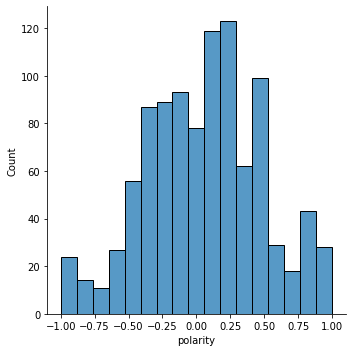

In [80]:
sns.displot(Trump_subset['polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



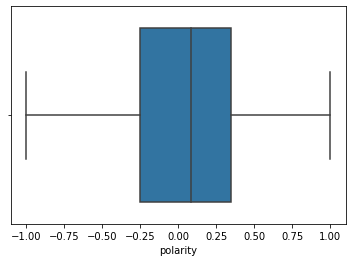

In [82]:
sns.boxplot(Trump_subset['polarity'])

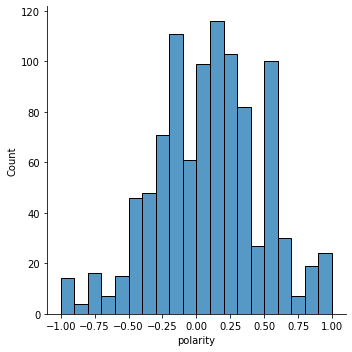

In [83]:
sns.displot(Biden_subset['polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



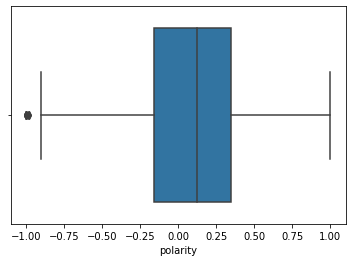

In [84]:
sns.boxplot(Biden_subset['polarity'])

In [85]:
Trump_subset.groupby('Expression').count()

,user,text,polarity
Expression,,,
Negative,449,449,449
Positive,551,551,551


In [86]:
Biden_subset.groupby('Expression').count()

,user,text,polarity
Expression,,,
Negative,393,393,393
Positive,607,607,607


In [94]:
def pol_percent(subset, total):
  neg_percent = ((subset.groupby('Expression').count())['polarity'][0]/total)*100
  pos_percent = ((subset.groupby('Expression').count())['polarity'][1]/total)*100

  return neg_percent, pos_percent

In [97]:
trump_pol_percent = pol_percent(Trump_subset, 500)
print(trump_pol_percent)

biden_pol_percent = pol_percent(Biden_subset, 500)
print(biden_pol_percent)

(89.8, 110.2)
(78.60000000000001, 121.39999999999999)


In [96]:
candidate = ['Donald Trump', 'Joe Biden']
pos = [trump_pol_percent[1], biden_pol_percent[1]]
neg = [trump_pol_percent[0], biden_pol_percent[0]]

go.Figure(data=[
    go.Bar(name = 'Positive', x=candidate, y=pos),
    go.Bar(name = 'Negative', x=candidate, y=neg),
])

In [111]:
trump_total_percent = pol_percent(Trump_subset, 4000)
trump_total_percent

(11.225, 13.775)

In [112]:
biden_total_percent = pol_percent(Biden_subset, 4000)
biden_total_percent

(9.825000000000001, 15.174999999999999)

In [113]:
trump_pos = trump_total_percent[1] + biden_total_percent[0]
print(trump_pos)
biden_pos = biden_total_percent[1] + trump_total_percent[0]
print(biden_pos)

23.6
26.4


In [114]:
go.Figure(go.Bar(y=['Trump\'s Favour', 'Biden\'s Favour'],
                 x = [trump_pos, biden_pos],
                 marker = {'color':['rgb(100,200,150)', 'rgb(90,150,200)']},
                 orientation = 'h')).update_layout(title_text='Public Sentiment')

In [115]:
def pos_tweets(tweets, title):

  most_pos_text = tweets[tweets['polarity'] == 1].text.head()

  most_pos_pol = tweets[tweets['polarity'] == 1].polarity.head()

  go.Figure(data=[go.Table(columnorder=[1,2],
                           columnwidth=[10,100],
                           header={'values':['Polarity', title], 'align': 'left'},
                           cells = {'values':[most_pos_pol, most_pos_text], 'align': 'left'}
                           )]).update_layout(title_text=title).show()

In [116]:
pos_tweets(Trump_subset, 'Positive tweets for Donald Trump')
pos_tweets(Biden_subset, 'Positive tweets for Joe Biden')

In [117]:
def neg_tweets(tweets, title):

  most_pos_text = tweets[tweets['polarity'] == -1].text.head()

  most_pos_pol = tweets[tweets['polarity'] == -1].polarity.head()

  go.Figure(data=[go.Table(columnorder=[1,2],
                           columnwidth=[10,100],
                           header={'values':['Polarity', title], 'align': 'left'},
                           cells = {'values':[most_pos_pol, most_pos_text], 'align': 'left'}
                           )]).update_layout(title_text=title).show()

In [118]:
neg_tweets(Trump_subset, 'Negative tweets for Donald Trump')
neg_tweets(Biden_subset, 'Negative tweets for Joe Biden')

In [149]:
def wordcloud(data, title):
  text = str(data.text)
  wc = WordCloud(max_font_size = 100, max_words = 500, scale = 10, relative_scaling = 0.6, background_color='white').generate(text)

  plt.figure(figsize=(15,10))
  plt.title(title, fontsize=30)
  plt.axis('off')
  plt.imshow(wc)

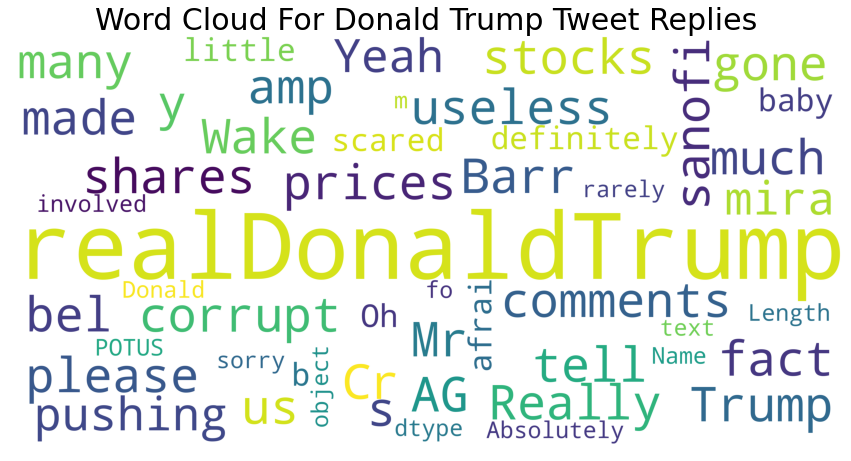

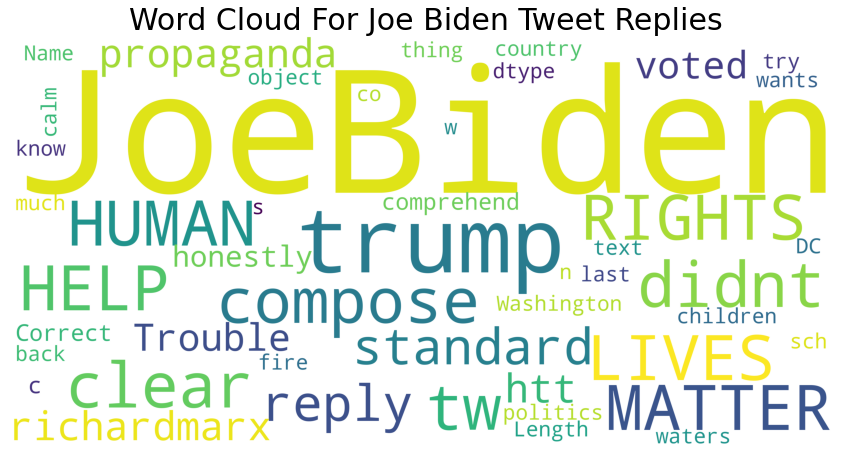

In [150]:
wordcloud(Trump_subset, 'Word Cloud For Donald Trump Tweet Replies')

wordcloud(Biden_subset, 'Word Cloud For Joe Biden Tweet Replies')